# CAMB Introduction

#### Introduction
In this notebook, we are going to learn a little about the code CAMB (Code for Anisotropies in the Microwave Background) originally written by Antony Lewis and Anthony Challinor. This code solves the relativistic Boltzmann equations at linear order given a cosmological model and then gives predictions for a range of cosmological observables. These include the full range of CMB anisotropies, interesting derived parameters and the low redshift matter power spectrum. Three common uses of this code are fitting CMB data (it was the main code used for interpreting data from the _Planck_ satellite), generating initial conditions for N-body simulations, and as a starting point for theoretical predictions of galaxy clustering. So it's a super useful code and one of the most widely used in cosmology!

We will go over how to install the code, choose some cosmological parameters, and generate some CMB and large scale structure data. From there, it's up to you to take the data from CAMB and plot the TT, TE and EE CMB power spectra and the matter power spectra for a few different cosmological models. For your assessment of this project you will want to include these plots in your talk and give a description of the physics behind how these power spectra change when you change the cosmological parameters.

#### Setting up the CAMB run
So, now onto running CAMB. There are an enormous number of parameters in the code, but fortunately most of these can remain hidden and fixed. The parameters we might be interested in changing are:

In [1]:
 # Import numpy for some useful routines. Also import the camb module we downloaded
import numpy as np
import camb

# Set some default cosmological parameters, close to the Planck best-fit values.
Omega_bh2 = 0.02242     # The baryon density times the hubble constant squared
Omega_cdmh2 = 0.11933   # The cold dark matter density times the hubble constant squared
Omega_k   = 0.0         # The intrinsic curvature of the Universe at the present day
H0 = 67.66              # The expansion rate of the Universe at the present day; The Hubbble Constant
DE_EoS = -1.0                 # The equation of state of dark energy
scalar_amplitude = 2.105e-9   # The amplitude of the fluctuations in the Universe after inflation
scalar_index = 0.96           # The power-law index of the fluctuations in the Universe after inflation

# Now use these parameters to set the cosmology of your Universe. lmax is the maximum angular
# scale we want to generate CMB power spectra for.
my_cosmology = camb.set_params(ombh2 = Omega_bh2, omch2 = Omega_cdmh2, omk = Omega_k, H0=H0, w=DE_EoS, 
                               As=scalar_amplitude, ns=scalar_index, lmax=2500)

Now we have set up our cosmology, we will also need to tell CAMB what we want it to compute. For our example we want the CMB power spectra (commonly called "Cls"). We also want the low redshift clustering of the Universe, which we get from the matter transfer function and power spectra. We might also want to look at some of the derived parameters of our Universe, such as the relationship between redshift and distance. We do this by setting the following flags:

In [2]:
my_cosmology.WantCls = True               # We want the CMB power spectra
my_cosmology.WantCMB = True               # We want the temperature and polarization power spectra
my_cosmology.WantTransfer = True          # We want the low redshift matter power spectrum
my_cosmology.WantDerivedParameters = True # We also want to compute some derived parameters

# Here we will also need to tell CAMB what redshifts we might want it to compute the matter power spectrum at
# We don't have to do this for the Cls as the CMB is only at one redshift. Let's choose z=0.0, 
# plus 10 logarithmically spaced values between 0.0 and 10
redshifts = np.concatenate([np.geomspace(10, 0.01, 11), [0.0]])
my_cosmology = my_cosmology.set_matter_power(redshifts=redshifts) 

And now we run CAMB. If you want you can "print run". This will spit out a list of the parameters of the run, which we can make sure match the values above. You will see many other parameters which we have left as default choices.

In [3]:
first_run = camb.get_results(my_cosmology)
# Uncomment the following line if you would like to see a list of all the parameters used in the run.
#print(first_run)

#### Looking at the results
Now lets look at some of the results from our run. With the last command CAMB has computed a whole bunch of things that you will want to plot. These might include:
* A plot of the redshift-distance relationship for your cosmology (comoving and angular diameter distances)
* A plot of the baryon, cold dark matter, curvature and dark energy densities as a function of redshift
* A plot of the CMB temperature-temperature power spectrum
* Plots of the CMB TE and EE power spectra
* A plot of the matter power spectrum at different redshifts
* The distance measured by Baryon Acoustic Oscillations as a function of redshift.

I'll give you the commands for how to retrieve this data from CAMB, but it's up to you to make the plots. The relevant commands are:

In [4]:
# Generate a list of redshifts for the background quantities
zmin, zmax, nz = 0.01, 30000.0, 2000
redshifts = np.logspace(np.log10(zmin), np.log10(zmax), nz)

# Get the comoving distance to the redshifts
d = first_run.comoving_radial_distance(redshifts)

# Get the luminosity distance to the redshifts (or just do (1+redshifts) * d)
dL = first_run.luminosity_distance(redshifts)

# Get the angular diameter distance to the redshifts (or just do d/(1+redshifts))
dA = first_run.angular_diameter_distance(redshifts)

# Get the BAO distance, defined as r_{s}/D_{V} (the ratio of the sound horizon to the 
# volume averaged distance) to the relevant redshifts
BAOparams = first_run.get_BAO(redshifts, my_cosmology)[0:,0]

# Get the densities of various components of the energy-momentum tensor. Can be
# one of ‘K’, ‘cdm’, ‘baryon’, ‘photon’, ‘neutrino’ (massless neutrinos), ‘nu’ (massive neutrinos), ‘de’
omega_matter     = first_run.get_Omega('baryon', redshifts)+first_run.get_Omega('cdm', redshifts)+first_run.get_Omega('nu', redshifts)
omega_radiation  = first_run.get_Omega('photon', redshifts)+first_run.get_Omega('neutrino', redshifts)
omega_darkenergy = first_run.get_Omega('de', redshifts)
omega_curvature  = first_run.get_Omega('K', redshifts)

# Get the CMB power spectra
TT, EE, BB, TE = np.split(first_run.get_cmb_power_spectra(spectra=['total'], CMB_unit='muK')['total'],4,axis=1)

print(first_run.get_derived_params())

{'age': 13.786918455467534, 'zstar': 1089.8159897135881, 'rstar': 144.57538243764182, 'thetastar': 1.0412446264569601, 'DAstar': 13.884862285396663, 'zdrag': 1060.0151583677537, 'rdrag': 147.22280416937582, 'kd': 0.14075132369697427, 'thetad': 0.16075178652895117, 'zeq': 3388.0569506428897, 'keq': 0.01033967914348091, 'thetaeq': 0.8160715711986881, 'thetarseq': 0.4508149750886559}


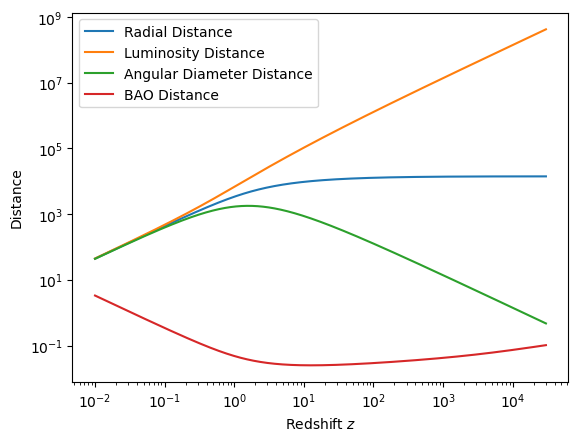

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(redshifts, d, label='Radial Distance')
ax.plot(redshifts, dL, label='Luminosity Distance')
ax.plot(redshifts, dA, label='Angular Diameter Distance')
ax.plot(redshifts, BAOparams, label='BAO Distance')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Redshift $z$")
ax.set_ylabel("Distance")
ax.legend();

The matter power spectrum is a little different and requires some explanation. We asked CAMB to compute this at a number of redshifts above. However, we might not want the values at all these redshifts, or we might want values at redshifts inbetween those we asked for above. So what we do instead is ask CAMB to create a 2D interpolator, which we can than use to get the matter power spectrum at any redshift or scale (between the max and min we asked for originally). We'll have a look behind-the-scenes at how this 2D interpolator is created in a subsequent workshop.

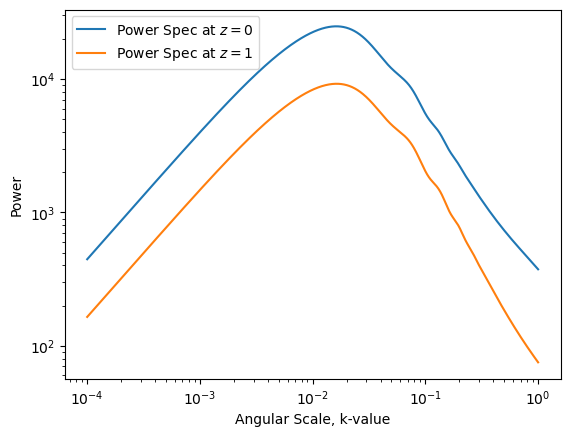

In [6]:
# Generate the interpolator
Pk_interpolator = first_run.get_matter_power_interpolator()

# Now ask the interpolator for a the power spectrum at a bunch of wavelengths at redshifts 0 and 1
kvalues = np.logspace(-4.0, 0.0, 1000)
Pk_z0, Pk_z1 = Pk_interpolator.P(0.0, kvalues), Pk_interpolator.P(1.0, kvalues)

fig, ax = plt.subplots()
ax.plot(kvalues, Pk_z0, label='Power Spec at $z = 0$')
ax.plot(kvalues, Pk_z1, label='Power Spec at $z = 1$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel("Angular Scale, k-value")
ax.set_ylabel("Power");

#### Exploring cosmology
Hopefully the code snippets above give you enough information to get started exploring how to use CAMB and what it calculates. Your task now is to take the two cosmological parameters you are interested in and see how that changes the different observables CAMB calculates. The easy way to do this would be to wrap everything up in a neat function that takes your cosmological parameters of interest and returns the observables. Something like this:

In [7]:
def run_camb(Omega_bh2=0.02242, Omega_cdmh2=0.11933, Omega_k=0.0, H0=67.66, DE_EoS=-1.0, 
             scalar_amplitude = 2.105e-9, max_pk_redshift=10.0):
    my_cosmology = camb.set_params(ombh2 = Omega_bh2, omch2 = Omega_cdmh2, omk = Omega_k, H0=H0, 
                                   w=DE_EoS, As=scalar_amplitude, WantCls=True, 
                                   WantTransfer=True, WantDerivedParameters=True, lmax=2500,
                                   redshifts=np.concatenate([np.logspace(np.log10(max_pk_redshift), -2.0, 100),[0.0]]))
    run = camb.get_results(my_cosmology)
    TT, EE, BB, TE = np.split(run.get_cmb_power_spectra(spectra=['total'], CMB_unit='muK')['total'],4,axis=1)
    Pk_interpolator = run.get_matter_power_interpolator()
    return [my_cosmology, run, TT, EE, BB, TE, Pk_interpolator]

You can even create an array of results for various cosmological models using the above function. For instance if we are interested in changing $\Omega_{b}$ and $w$, we could do

In [8]:
Omega_b_vals = np.linspace(0.04, 0.06, 10)
Omega_cdm_vals = np.linspace(0.24, 0.29, 10)
results = []
for i in range(len(Omega_b_vals)):
    for j in range(len(Omega_cdm_vals)):
        results.append(run_camb(Omega_bh2=Omega_b_vals[i]*0.6766**2, Omega_cdmh2=Omega_cdm_vals[j]*0.6766**2))

Each element of 'results' now contains the observables for a different cosmological model. You can access the individual observables for each cosmology using the correponding elements of results, i.e., 

In [9]:
# Each element in results contains a list of [my_cosmology, run, TT, EE, BB, TE, Pk_interpolator] 
# in that order. So e.g., results[0][1] contains "run" for the first cosmology in the set. This can then 
# be called, just like "first_run" above.

# For Omega_b=0.04, w=-0.9 (element 0)
d_new = results[0][1].comoving_radial_distance(redshifts)
BAO_new = results[0][1].get_BAO(redshifts, results[0][0])[0:,0]
TT_new, EE_new, BB_new, TE_new = results[0][2], results[0][3], results[0][4], results[0][5]
Pk_z0_new, Pk_z1_new = results[0][6].P(0.0, kvalues), results[0][6].P(1.0, kvalues)

# For Omega_b=0.05, w=-1.1 (element 3)
d_new = results[3][1].comoving_radial_distance(redshifts)
BAO_new = results[3][1].get_BAO(redshifts, results[3][0])[0:,0]
TT_new, EE_new, BB_new, TE_new = results[0][2], results[3][3], results[3][4], results[3][5]
Pk_z0_new, Pk_z1_new = results[3][6].P(0.0, kvalues), results[3][6].P(1.0, kvalues)

#### Working towards the assessment
The assessment for this project is a 10 minute presentation on how the CMB and late time probes of cosmology constrain (or don't!) certain cosmological parameters. You will probably want to use this notebook to look at which observables are affected when you change the cosmological parameters you have chosen. Your job is to then try and understand the physics relating the cosmological parameters and the observables. What changes when you change the cosmology? What doesn't? Why? 

To work towards this, try making some plots of the observables listed above for different cosmological parameters.

In later workshops, we will look at this in more detail, first fitting the TT power spectrum from Planck to see what it constrains, and secondly looking at how those constraints improve when we add additional data. Hopefully this notebook will be useful in interpreting why adding those additional datasets improves our knowledge of cosmology.

[[   0.        ]
 [   0.        ]
 [1113.99886683]
 ...
 [  58.078624  ]
 [  57.94880763]
 [  57.82026302]]
2551


[None]

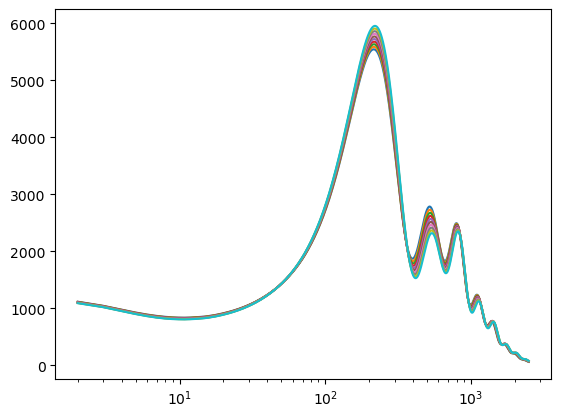

In [51]:
fig, ax = plt.subplots()
print(TT_new)
lmax = 2500
print(len(TT_new))
l = np.linspace(2, lmax, len(TT_new) - 2)

# k_vals = np.logspace(-5, 0, 100)
for i in range(100):
    if i%10 == 0:
#         ax.plot(k_vals, results[i][6].P(1100.0, k_vals))
        ax.plot(l, results[i][2][2:])
ax.set(xscale='log')

##### 